In [5]:
import pandas as pd

df = pd.read_csv("zakiya_report.csv")
print(df.shape)
df.head(10)


(84, 7)


,Time Ran,Ability Name,Agent,Host,pid,Link Command,Plaintext Command
0,2025-10-01T20:42:02Z,Custom - Encoded PowerShell Test (110000),bydmzm,onisa-VirtualBox,52772,echo 'SGVsbG8gV29ybGQh' | base64 --decode >/tm...,echo 'SGVsbG8gV29ybGQh' | base64 --decode >/tm...
1,2025-10-01T20:42:02Z,Custom - Encoded PowerShell Test (110000),maqmre,DESKTOP-B2K36HT,2880,powershell -NoProfile -ExecutionPolicy Bypass ...,powershell -NoProfile -ExecutionPolicy Bypass ...
2,2025-10-01T20:42:27Z,Access /etc/passwd (Local),bydmzm,onisa-VirtualBox,52782,cat /etc/passwd > /tmp/T1003.008.txt; cat /tmp...,cat /etc/passwd > /tmp/T1003.008.txt; cat /tmp...
3,2025-10-01T20:42:27Z,Cached Credential Dump via Cmdkey,maqmre,DESKTOP-B2K36HT,5308,cmdkey /list,cmdkey /list
4,2025-10-01T20:43:23Z,Remote System Discovery - arp nix,bydmzm,onisa-VirtualBox,52789,"if [ -x ""$(command -v arp)"" ]; then : ; else (...","if [ -x ""$(command -v arp)"" ]; then : ; else (..."
5,2025-10-01T20:43:23Z,WMI Reconnaissance List Remote Services,maqmre,DESKTOP-B2K36HT,760,"wmic /node:""127.0.0.1"" service where (caption ...","wmic /node:""127.0.0.1"" service where (caption ..."
6,2025-10-01T20:44:13Z,emacs spawning an interactive system shell,bydmzm,onisa-VirtualBox,52808,"sh -c ""arp -a 2>/dev/null || arp 2>/dev/null""","sh -c ""arp -a 2>/dev/null || arp 2>/dev/null"""
7,2025-10-01T20:44:13Z,Delete Windows Defender Scheduled Tasks,maqmre,DESKTOP-B2K36HT,6308,"IF EXIST ""%temp%\Windows_Defender_Scheduled_Sc...","IF EXIST ""%temp%\Windows_Defender_Scheduled_Sc..."
8,2025-10-01T20:45:14Z,Dump history,bydmzm,onisa-VirtualBox,52816,cat ~/.bash_history,cat ~/.bash_history
9,2025-10-01T20:45:14Z,iwr or Invoke Web-Request download,maqmre,DESKTOP-B2K36HT,2796,powershell.exe iwr -URI https://raw.githubuser...,powershell.exe iwr -URI https://raw.githubuser...


In [6]:
import pandas as pd
import numpy as np

gt = pd.read_csv("zakiya_report.csv")   # ground-truth
# Normalize columns (safe)
gt.columns = [c.strip() for c in gt.columns]

# parse time
gt['time_ran'] = pd.to_datetime(gt['Time Ran'], errors='coerce', utc=True)

# infer OS from Host (based on your naming)
gt['OS'] = gt['Host'].astype(str).str.lower().apply(lambda s: 'Linux' if 'onisa' in s or 'virtualbox' in s else ('Windows' if 'desktop' in s else 'Unknown'))

# get MITRE-ish fields from Ability Name (optional: you may map to exact MITRE IDs if available)
# Example: extract the immediate technique token if present (Txxxx) from Ability Name or elsewhere
gt['mitre_id'] = gt['Ability Name'].str.extract(r'(T\d{4}(?:\.\d{3})?)', expand=False)

# quick summaries
print("Rows:", len(gt))
print("Hosts:", gt['Host'].unique())
print("Ability counts by OS:\n", gt.groupby('OS').size())
print("Top abilities:\n", gt['Ability Name'].value_counts().head(20))
gt.head(10)


Rows: 84
Hosts: ['onisa-VirtualBox' 'DESKTOP-B2K36HT']
Ability counts by OS:
 OS
Linux      49
Windows    35
dtype: int64
Top abilities:
 Custom - Encoded PowerShell Test (110000)       12
SUDO Brute Force - Debian                        7
Access /etc/passwd (Local)                       6
Cached Credential Dump via Cmdkey                6
Remote System Discovery - arp nix                6
emacs spawning an interactive system shell       6
Delete Windows Defender Scheduled Tasks          6
Dump history                                     6
iwr or Invoke Web-Request download               6
Account Discovery (targeted)                     6
Prevent Powershell History Logging               6
WMI Reconnaissance List Remote Services          5
Clear Bash history (cat dev/null)                3
Packet Capture Linux using tshark or tcpdump     3
Name: Ability Name, dtype: int64


,Time Ran,Ability Name,Agent,Host,pid,Link Command,Plaintext Command,time_ran,OS,mitre_id
0,2025-10-01T20:42:02Z,Custom - Encoded PowerShell Test (110000),bydmzm,onisa-VirtualBox,52772,echo 'SGVsbG8gV29ybGQh' | base64 --decode >/tm...,echo 'SGVsbG8gV29ybGQh' | base64 --decode >/tm...,2025-10-01 20:42:02+00:00,Linux,NaN
1,2025-10-01T20:42:02Z,Custom - Encoded PowerShell Test (110000),maqmre,DESKTOP-B2K36HT,2880,powershell -NoProfile -ExecutionPolicy Bypass ...,powershell -NoProfile -ExecutionPolicy Bypass ...,2025-10-01 20:42:02+00:00,Windows,NaN
2,2025-10-01T20:42:27Z,Access /etc/passwd (Local),bydmzm,onisa-VirtualBox,52782,cat /etc/passwd > /tmp/T1003.008.txt; cat /tmp...,cat /etc/passwd > /tmp/T1003.008.txt; cat /tmp...,2025-10-01 20:42:27+00:00,Linux,NaN
3,2025-10-01T20:42:27Z,Cached Credential Dump via Cmdkey,maqmre,DESKTOP-B2K36HT,5308,cmdkey /list,cmdkey /list,2025-10-01 20:42:27+00:00,Windows,NaN
4,2025-10-01T20:43:23Z,Remote System Discovery - arp nix,bydmzm,onisa-VirtualBox,52789,"if [ -x ""$(command -v arp)"" ]; then : ; else (...","if [ -x ""$(command -v arp)"" ]; then : ; else (...",2025-10-01 20:43:23+00:00,Linux,NaN
5,2025-10-01T20:43:23Z,WMI Reconnaissance List Remote Services,maqmre,DESKTOP-B2K36HT,760,"wmic /node:""127.0.0.1"" service where (caption ...","wmic /node:""127.0.0.1"" service where (caption ...",2025-10-01 20:43:23+00:00,Windows,NaN
6,2025-10-01T20:44:13Z,emacs spawning an interactive system shell,bydmzm,onisa-VirtualBox,52808,"sh -c ""arp -a 2>/dev/null || arp 2>/dev/null""","sh -c ""arp -a 2>/dev/null || arp 2>/dev/null""",2025-10-01 20:44:13+00:00,Linux,NaN
7,2025-10-01T20:44:13Z,Delete Windows Defender Scheduled Tasks,maqmre,DESKTOP-B2K36HT,6308,"IF EXIST ""%temp%\Windows_Defender_Scheduled_Sc...","IF EXIST ""%temp%\Windows_Defender_Scheduled_Sc...",2025-10-01 20:44:13+00:00,Windows,NaN
8,2025-10-01T20:45:14Z,Dump history,bydmzm,onisa-VirtualBox,52816,cat ~/.bash_history,cat ~/.bash_history,2025-10-01 20:45:14+00:00,Linux,NaN
9,2025-10-01T20:45:14Z,iwr or Invoke Web-Request download,maqmre,DESKTOP-B2K36HT,2796,powershell.exe iwr -URI https://raw.githubuser...,powershell.exe iwr -URI https://raw.githubuser...,2025-10-01 20:45:14+00:00,Windows,NaN


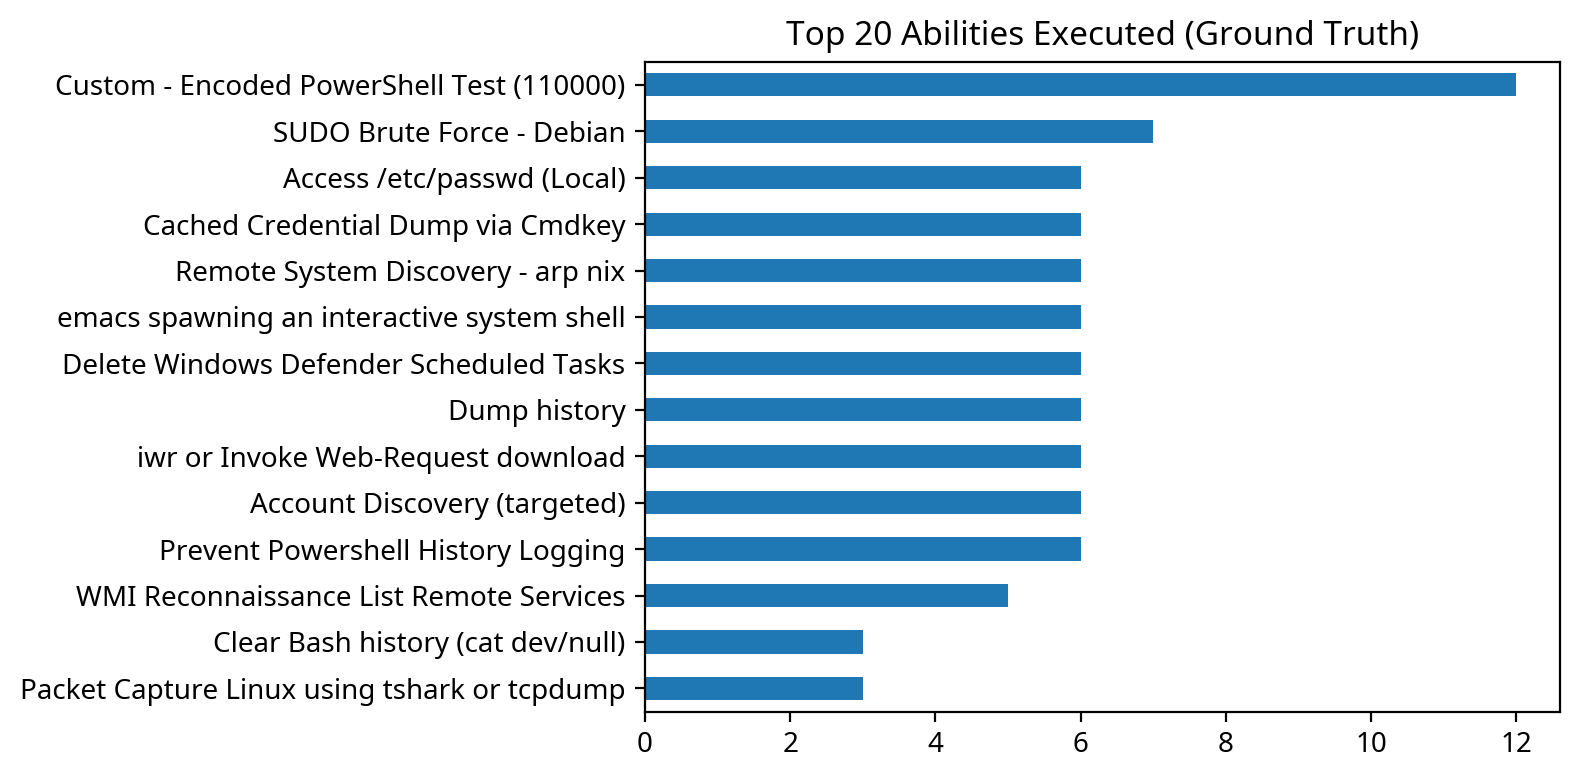

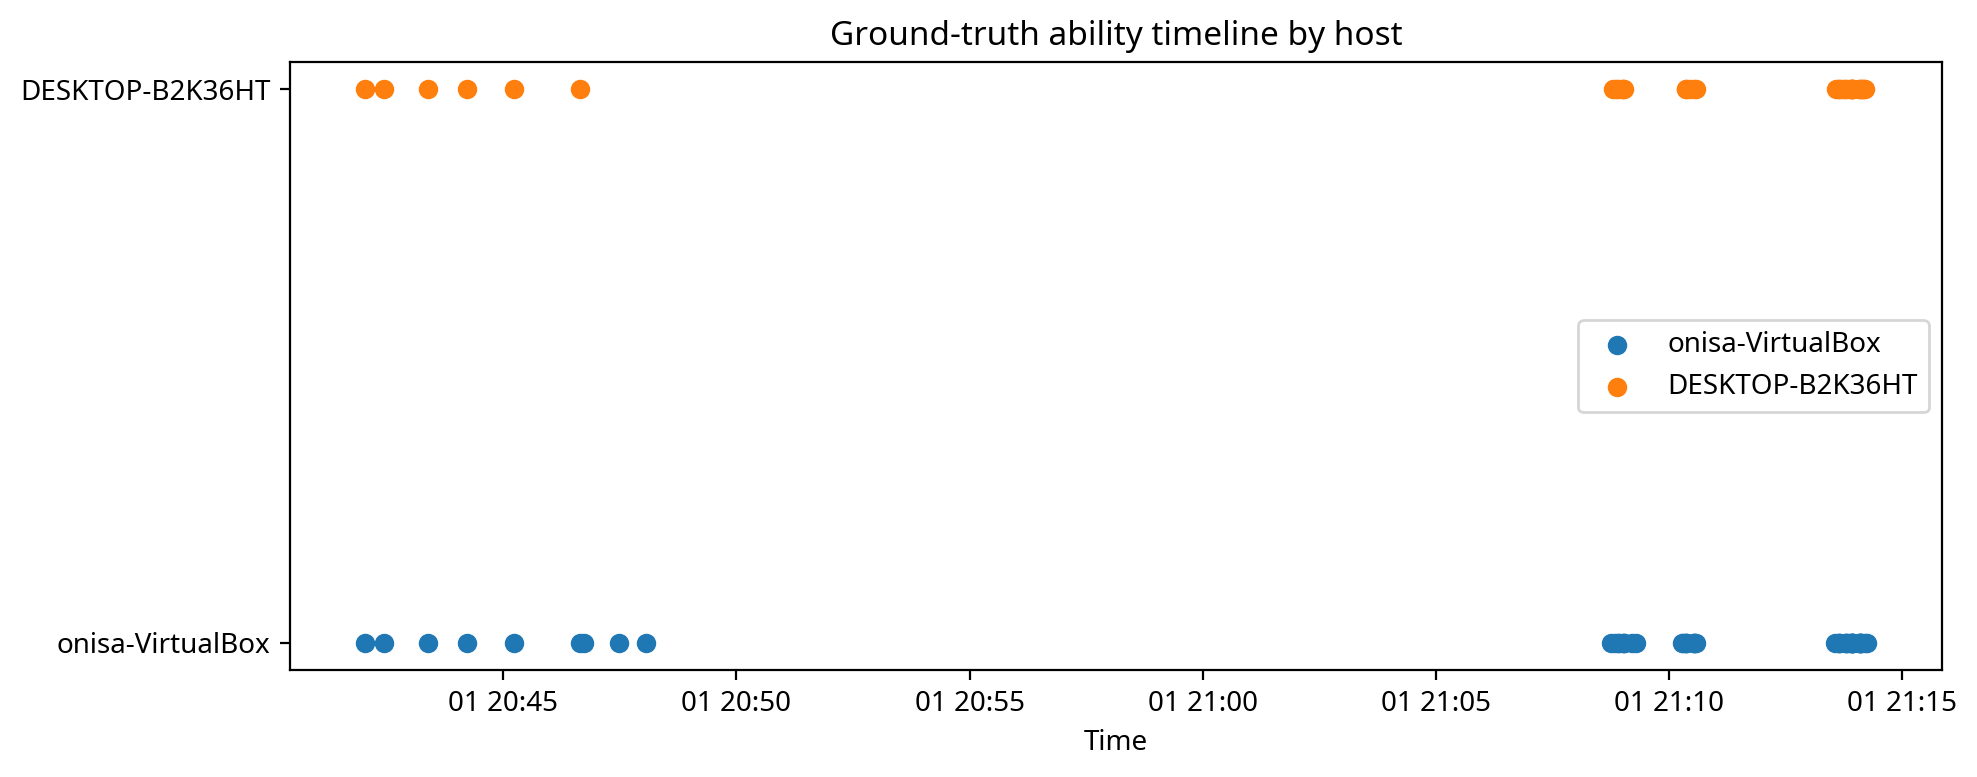

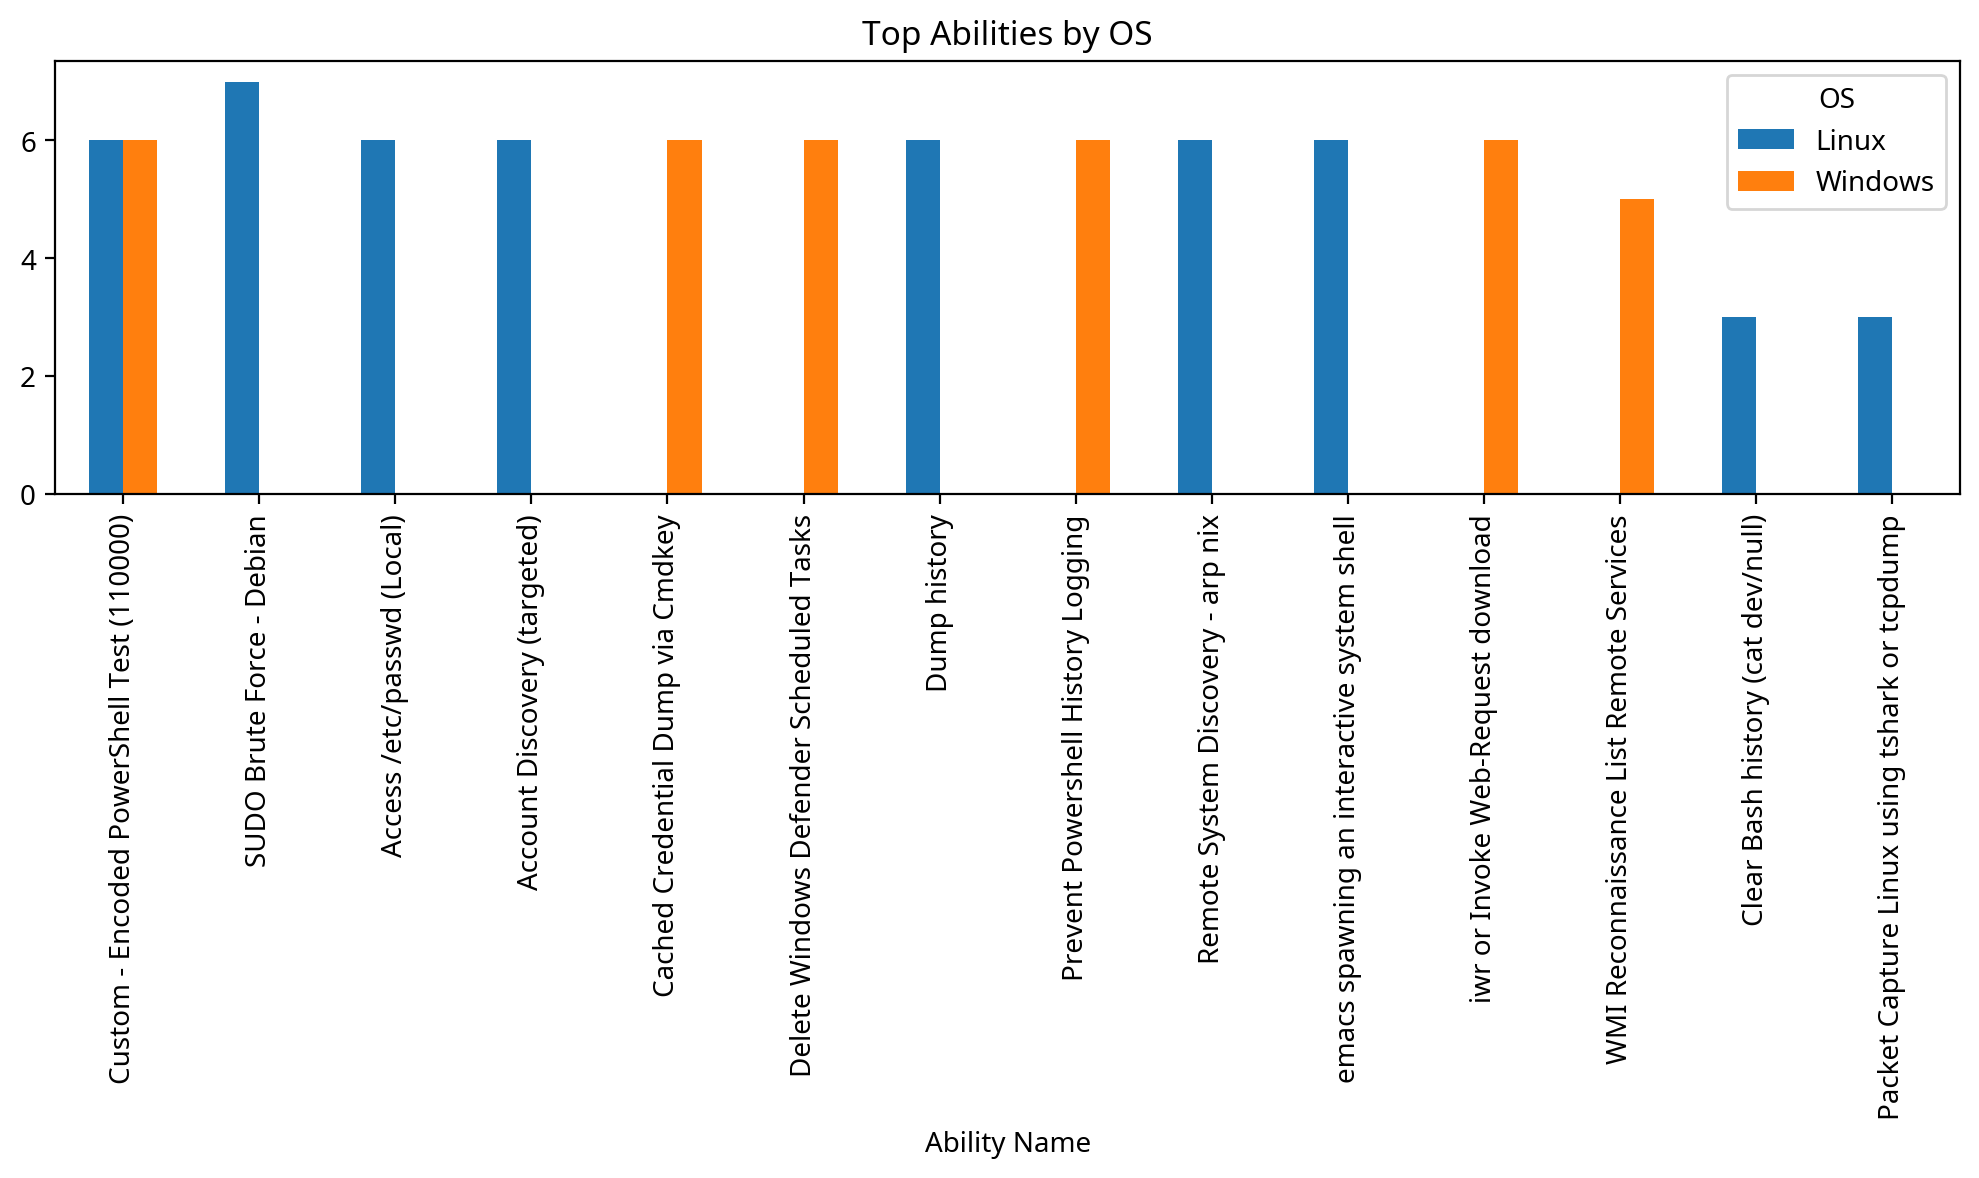

In [7]:
import matplotlib.pyplot as plt

# 1) Bar: abilities per MITRE id (or ability name)
plt.figure(figsize=(8,4))
gt['Ability Name'].value_counts().head(20).plot(kind='barh')
plt.title("Top 20 Abilities Executed (Ground Truth)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 2) Timeline scatter: each ability as a point per host
plt.figure(figsize=(10,4))
hosts = gt['Host'].unique()
for i,h in enumerate(hosts):
    sub = gt[gt['Host']==h]
    plt.scatter(sub['time_ran'], [i]*len(sub), label=h)
plt.yticks(range(len(hosts)), hosts)
plt.title("Ground-truth ability timeline by host")
plt.xlabel("Time")
plt.tight_layout()
plt.legend()
plt.show()

# 3) Technique frequency by OS heatmap (crosstab)
ct = pd.crosstab(gt['Ability Name'], gt['OS'])
# keep only top N abilities
topN = ct.sum(axis=1).sort_values(ascending=False).head(20).index
ct.loc[topN].plot(kind='bar', figsize=(10,6))
plt.title("Top Abilities by OS")
plt.tight_layout()
plt.show()


In [9]:
# Load Wazuh alerts (example)
waz = pd.read_csv("Data 4.csv")   # or whatever your alerts file is
# Normalize waz columns if needed (rename 'timestamp' etc.)
# waz = waz.rename(columns={c: c.replace("\\.", "."): c for c in waz.columns})  # optional
# Parse waz timestamp
waz['alert_time'] = pd.to_datetime(waz['timestamp'].astype(str).str.replace(' @ ',' '), errors='coerce', utc=True)

# Optional: unify a message/command column to match plaintext
# assume waz has a column with command-like text in 'message' or similar — try common names:
possible_cmd_cols = [c for c in waz.columns if 'msg' in c.lower() or 'message' in c.lower() or 'command' in c.lower()]
print("candidate waz cmd columns:", possible_cmd_cols)
# pick first if present
cmd_col = possible_cmd_cols[0] if possible_cmd_cols else None

# Strategy: merge-as-of by time to find candidate alerts near each ability
# first sort both
gt_sorted = gt.sort_values('time_ran').reset_index(drop=True)
waz_sorted = waz.sort_values('alert_time').reset_index(drop=True)

# Merge-as-of to get nearest alert before or after. We can do two merges (nearest earlier, nearest later)
left = pd.merge_asof(gt_sorted, waz_sorted, left_on='time_ran', right_on='alert_time', direction='nearest', tolerance=pd.Timedelta("30s"), suffixes=('','_waz'))
# 'direction=nearest' and tolerance = search window; adjust to 5s/30s/60s as you need.

# left now has columns from waz appended where a close alert exists. Compute latency
left['detected'] = ~left['alert_time'].isna()
left['latency_s'] = (left['alert_time'] - left['time_ran']).dt.total_seconds()

# If using textual matching (plaintext command)
if cmd_col:
    # mark textual matches (naive substring match)
    left['text_match'] = left.apply(lambda r: (str(r['Plaintext Command']).strip() != '' and
                                               isinstance(r.get(cmd_col), str) and
                                               str(r['Plaintext Command']).strip() in r.get(cmd_col, '')), axis=1)
    # you can combine criteria: detected_by_time_or_text = detected | text_match
    left['detected_by_text'] = left['text_match']

# Summary metrics
detection_rate = left['detected'].mean()
print("Detection rate (within ±30s):", detection_rate)
print("Latency stats (seconds) for detected:", left.loc[left['detected'], 'latency_s'].describe())

# Per-technique detection
per_tech = left.groupby('Ability Name').agg(
    attempts=('Time Ran','count'),
    detected=('detected','sum'),
    median_latency_s=('latency_s', lambda x: x.dropna().median())
).sort_values('attempts', ascending=False)
per_tech['detection_rate'] = per_tech['detected'] / per_tech['attempts']
per_tech.head(40)


candidate waz cmd columns: []
Detection rate (within ±30s): 1.0
Latency stats (seconds) for detected: count    84.000000
mean     -4.092690
std      10.023335
min     -25.925000
25%     -10.779000
50%      -0.345000
75%       1.251000
max      19.986000
Name: latency_s, dtype: float64


,attempts,detected,median_latency_s,detection_rate
Ability Name,,,,
Custom - Encoded PowerShell Test (110000),12,12,0.7145,1.0
SUDO Brute Force - Debian,7,7,0.1780,1.0
Access /etc/passwd (Local),6,6,-2.6315,1.0
Account Discovery (targeted),6,6,-2.5295,1.0
Cached Credential Dump via Cmdkey,6,6,-2.6315,1.0
Delete Windows Defender Scheduled Tasks,6,6,-5.5665,1.0
Dump history,6,6,0.3030,1.0
Prevent Powershell History Logging,6,6,-2.4040,1.0
Remote System Discovery - arp nix,6,6,-0.6915,1.0
